In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
from sklearn.model_selection import train_test_split
import time

In [2]:
def preprocessing(df_scaling, scaled_form = 'MinMaxScaler()'):
    # 불필요한 컬럼 제거
    if 'ID' in df_scaling:
        df_scaling = df_scaling.drop("ID", axis = 1)
        if len(df_scaling.columns) == 1:
            return df_scaling
        
        df_scaling = df_scaling.drop('oral', axis = 1) 
        # 범주형 피처 레이블 인코딩 
        cate_features = df_scaling[['gender','tartar']]

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["gender"])
        df_scaling["gender"] = lbe.fit_transform(df_scaling["gender"])

        lbe = LabelEncoder()
        lbe.fit_transform(df_scaling["tartar"])
        df_scaling["tartar"] = lbe.fit_transform(df_scaling["tartar"])
        # BMI 지수 계산
        # bmi = kg/m^2
        df_scaling['bmi'] = df_scaling['weight(kg)']/((df_scaling['height(cm)']*0.01)**2)
        # wwi(비만 지수) 지수 계산
        df_scaling['wwi'] = df_scaling['waist(cm)']/(df_scaling['weight(kg)'].apply(np.sqrt))


        # 정규화 작업
        cate_features = df_scaling[['gender', 'tartar', 'hearing(right)', 'hearing(left)', 'dental caries']]
        scaled_features = df_scaling.drop(cate_features.columns, axis=1)
        if scaled_form == 'StandardScaler()':
            # Standard scaler
            scaler = StandardScaler()
            scaler.fit(scaled_features)
            scaled = scaler.transform(scaled_features)
            standard_scaled = pd.DataFrame(scaled,columns = scaled_features.columns)
            standard_scaled[cate_features.columns] = cate_features

            return standard_scaled
        else:
            # MinMax scaler
            scaler_M = MinMaxScaler()
            scaler_M.fit(scaled_features)
            scaled_M = scaler_M.transform(scaled_features)
            min_max_scaled = pd.DataFrame(scaled_M,columns = scaled_features.columns)
            min_max_scaled[cate_features.columns] = cate_features

            return min_max_scaled

In [3]:
# competition_format
x_train = pd.read_csv('./data/Smoking_raw/competition_format/x_train.csv')
x_test = pd.read_csv('./data/Smoking_raw/competition_format/x_test.csv')
y_train = pd.read_csv('./data/Smoking_raw/competition_format/y_train.csv')
y_test = pd.read_csv('./data/Smoking_raw/competition_format/y_test.csv')

In [4]:
x_train_s = preprocessing(x_train,scaled_form ='StandardScaler()')
x_test_s = preprocessing(x_test,'StandardScaler()')
y_train_s = preprocessing(y_train,'StandardScaler()')
y_test_s = preprocessing(y_test,'StandardScaler()')

In [5]:
x_train_s.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,AST,ALT,Gtp,bmi,wwi,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.430331,-0.254602,-0.257586,0.231311,0.502492,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.220763,-0.254602,-0.435020,-0.210748,0.444016,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.273155,-0.349076,-0.356161,-0.980727,0.249093,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.377939,-0.034160,-0.435020,0.443546,0.536052,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.535115,-0.412060,-0.356161,0.231311,1.418627,0,0,1.0,1.0,0.0


## Standard Scaler

In [6]:
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve,precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC


In [7]:
# 선형 SVM (하드 마진)
# C : 값이 클수록 하드마진
model1_s=SVC(kernel='linear',C=1.0).fit(x_train_s,y_train_s)

print('model 훈련 점수 : {: .3f}'.format(model1_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model1_s.score (x_test_s, y_test_s)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.743
model 테스트 점수 :  0.748


In [8]:
# C=5
model2_s=SVC(kernel='linear',C=5).fit(x_train_s,y_train_s)
print('model 훈련 점수 : {: .3f}'.format(model2_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model2_s.score (x_test_s, y_test_s)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.743
model 테스트 점수 :  0.748


In [10]:
model3_s=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_s,y_train_s)

print('model 훈련 점수 : {: .3f}'.format(model3_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model3_s.score (x_test_s, y_test_s)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  1.000
model 테스트 점수 :  0.998


In [9]:
# rbf
# c=1 gamma=3
model5_s=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_s,y_train_s)

print('model 훈련 점수 : {: .3f}'.format(model5_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model5_s.score (x_test_s, y_test_s)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  1.000
model 테스트 점수 :  0.995


In [12]:
pred=model5_s.predict(x_train_s)

In [13]:
confusion_matrix( y_train_s, pred)

array([[28201,     0],
       [    0, 16352]], dtype=int64)

In [14]:
pred_t=model5_s.predict(x_test_s)

In [15]:
confusion_matrix( y_test_s, pred_t)

array([[7036,    0],
       [  57, 4046]], dtype=int64)

## min-max Scaler

In [16]:
x_train_m = preprocessing(x_train)
x_test_m = preprocessing(x_test)
y_train_m = preprocessing(y_train)
y_test_m = preprocessing(y_test)

In [17]:
x_train_m.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,AST,ALT,Gtp,bmi,wwi,gender,tartar,hearing(right),hearing(left),dental caries
0,0.307692,0.416667,0.285714,0.388462,0.112245,0.091837,0.254438,0.311321,0.104575,0.410256,...,0.009195,0.006179,0.026052,0.379885,0.447066,0,1,1.0,1.0,0.0
1,0.307692,0.500000,0.285714,0.384615,0.071429,0.051020,0.284024,0.283019,0.183007,0.351282,...,0.012261,0.006179,0.017034,0.325362,0.442914,0,1,1.0,1.0,0.0
2,0.538462,0.666667,0.285714,0.371795,0.071429,0.071429,0.396450,0.433962,0.093682,0.479487,...,0.011494,0.005149,0.021042,0.230392,0.429073,1,0,1.0,1.0,0.0
3,0.307692,0.583333,0.380952,0.474359,0.142857,0.142857,0.171598,0.188679,0.108932,0.684615,...,0.009962,0.008582,0.017034,0.406062,0.449449,1,1,1.0,1.0,0.0
4,0.307692,0.416667,0.285714,0.448718,0.091837,0.091837,0.289941,0.320755,0.074074,0.330769,...,0.007663,0.004463,0.021042,0.379885,0.512118,0,0,1.0,1.0,0.0


In [18]:
# 선형 SVM (하드 마진)
model1_m=SVC(kernel='linear',C=1.0).fit(x_train_m,y_train_m)
# C : 값이 클스록 하드마진
print('model 훈련 점수 : {: .3f}'.format(model1_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model1_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.740
model 테스트 점수 :  0.738


In [19]:
model2_m=SVC(kernel='linear',C=5).fit(x_train_m,y_train_m)
print('model 훈련 점수 : {: .3f}'.format(model2_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model2_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.742
model 테스트 점수 :  0.740


In [20]:
# rbf
model5_m=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_m,y_train_m)

print('model 훈련 점수 : {: .3f}'.format(model5_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model5_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.763
model 테스트 점수 :  0.758


In [21]:
model6_m=SVC(kernel='rbf',C=3,gamma=10).fit(x_train_m,y_train_m)

print('model 훈련 점수 : {: .3f}'.format(model6_m.score (x_train_m, y_train_m)))
print('model 테스트 점수 : {: .3f}'.format(model6_m.score (x_test_m, y_test_m)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.825
model 테스트 점수 :  0.743


## PCA 후 SVM (수행속도 단축?)

In [22]:
# 주성분 2개로 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

#### standard scaling 사용

In [23]:
x_train_s

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,AST,ALT,Gtp,bmi,wwi,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.430331,-0.254602,-0.257586,0.231311,0.502492,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.220763,-0.254602,-0.435020,-0.210748,0.444016,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.273155,-0.349076,-0.356161,-0.980727,0.249093,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.377939,-0.034160,-0.435020,0.443546,0.536052,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.535115,-0.412060,-0.356161,0.231311,1.418627,0,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0.478900,0.580854,-0.068892,0.638353,0.385691,0.392559,1.933796,1.852111,0.128566,-0.411714,...,0.984253,0.690148,0.215573,-0.482963,1.135535,1,1,1.0,1.0,0.0
44549,-0.761903,1.124422,0.321016,0.207234,-0.843500,-0.630445,-1.207506,-0.210770,-0.543054,-0.274436,...,-0.325547,-0.412060,-0.474450,-0.377721,-0.185800,1,1,1.0,1.0,0.0
44550,-0.761903,1.124422,0.321016,-1.204680,1.000286,1.006362,-0.403917,-0.623346,-0.207244,-1.427569,...,-0.430331,-0.254602,-0.592740,-0.377721,-2.549865,1,1,1.0,1.0,0.0
44551,0.478900,0.037285,1.880649,2.664611,-0.433770,-1.039647,0.034404,-0.107626,-0.399135,-0.494080,...,0.198373,0.690148,-0.001292,2.557101,1.652891,1,1,1.0,1.0,0.0


In [24]:
x_train_pca=pca.fit_transform(x_train_s)

In [25]:
x_train_pca

array([[-1.64803822,  0.61271505],
       [-1.11547122,  1.08826135],
       [ 0.33437829,  0.82075445],
       ...,
       [-0.79788726, -3.44431672],
       [ 2.98627439,  1.46984087],
       [ 0.80609413, -1.28753026]])

In [26]:
x_test_pca=pca.fit_transform(x_test_s)

In [27]:
x_test_pca

array([[ 0.05177001,  2.29535896],
       [ 3.17031619, -0.05768663],
       [ 1.96994521, -1.03264272],
       ...,
       [-3.83114962, -0.13066743],
       [-0.82225634,  0.94523652],
       [ 0.45255854,  1.23121222]])

#### 시간축소되지만, 성능 매우 떨어짐

In [28]:
start = time.time()
# 작업
model3_pca=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_pca,y_train_s)
print('model 훈련 점수 : {: .3f}'.format(model3_pca.score (x_train_pca, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model3_pca.score (x_test_pca, y_test_s)))
#
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


model 훈련 점수 :  0.701
model 테스트 점수 :  0.702
time : 552.3651204109192


## 성능비교

## 비교적 성능(연산속도 and 정확도) 좋음

In [54]:
start = time.time()
model5_s=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_s,y_train_s)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 769.8891303539276


In [55]:
print('model 훈련 점수 : {: .3f}'.format(model5_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model5_s.score (x_test_s, y_test_s)))

model 훈련 점수 :  1.000
model 테스트 점수 :  0.995


### Colab 실행결과

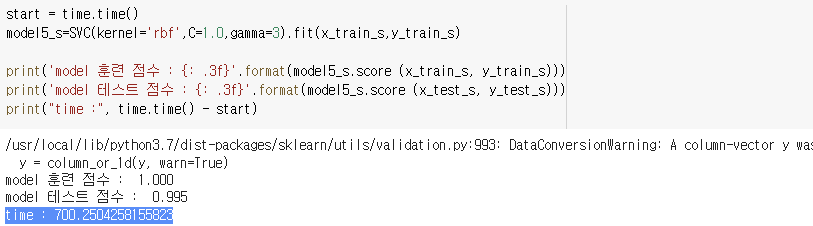

## 성능(연산속도 or 정확도) 낮음

In [42]:
start = time.time()
model3_s=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_s,y_train_s)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 772.9215950965881


In [45]:
print('model 훈련 점수 : {: .3f}'.format(model3_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model3_s.score (x_test_s, y_test_s)))

model 훈련 점수 :  1.000
model 테스트 점수 :  0.998


In [43]:
start = time.time()
model4_s=SVC(kernel='rbf',C=0.5,gamma=1).fit(x_train_s,y_train_s)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 472.0197231769562


In [52]:
print('model 훈련 점수 : {: .3f}'.format(model4_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model4_s.score (x_test_s, y_test_s)))

model 훈련 점수 :  0.677
model 테스트 점수 :  0.671


# 모형 선택

In [81]:
model5_s.n_features_in_

26

In [30]:
start = time.time()

print('model 테스트 점수 : {: .3f}'.format(model5_s.score (x_test_s, y_test_s)))

print("time :", time.time() - start)

model 테스트 점수 :  0.995
time : 63.62654399871826


### Confusion Matrix

In [31]:
start = time.time()

pred=model5_s.predict(x_train_s)
print(confusion_matrix( y_train_s, pred))

print("time :", time.time() - start)

[[28201     0]
 [    0 16352]]
time : 301.40771102905273


In [38]:
start = time.time()

pred_t=model5_s.predict(x_test_s)
confusion_m=confusion_matrix( y_test_s, pred_t)

print("time :", time.time() - start)

time : 67.08004236221313


In [40]:
print(confusion_m)

[[7036    0]
 [  57 4046]]


### Colab 실행결과

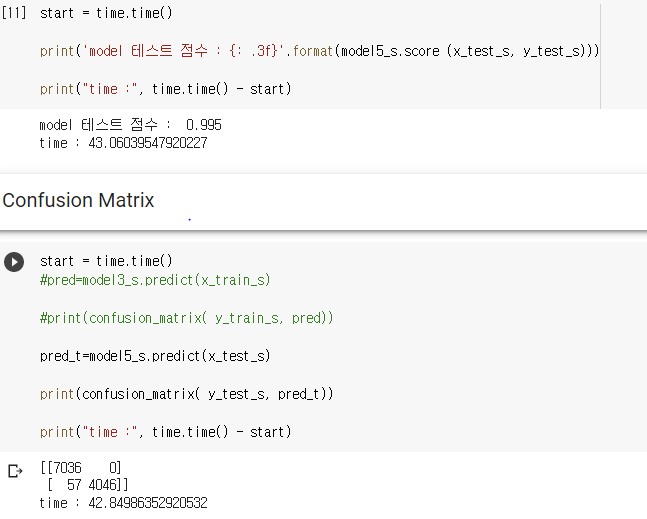

### 정밀도 재현율 f1score

In [35]:
start=time.time()
pre=precision_score(y_test_s , pred_t)
rec=recall_score(y_test_s , pred_t)
f1=f1_score(y_test_s,pred_t)
auc=roc_auc_score(y_test_s, pred_t)
print(time.time()-start)

0.027619600296020508


In [37]:
# 정밀도
print('정밀도 : {:.3f}'.format(pre))
# 재현율
print('재현율 : {:.3f}'.format(rec))
# f1_score
print('F1_score : {:.3f}'.format(f1))
# AUC score 
print('ROC_AUC_score : {:.3f}'.format(auc))

정밀도 : 1.000
재현율 : 0.986
F1_score : 0.993
ROC_AUC_score : 0.993


## 모델저장

In [75]:
import joblib

In [76]:
joblib.dump(model5_s, './model5_s.pkl')
joblib.dump(model3_s, './model3_s.pkl')
joblib.dump(model4_s, './model4_s.pkl')

['./model4_s.pkl']

# 변수 제거 후 재모델링(bmi,wwi)

In [59]:
x_train_s.drop(['bmi','wwi'],axis=1)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.214896,-0.823115,-0.430331,-0.254602,-0.257586,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.214896,-1.265418,-0.220763,-0.254602,-0.435020,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.214896,0.503794,-0.273155,-0.349076,-0.356161,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.214896,0.503794,-0.377939,-0.034160,-0.435020,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.214896,-1.265418,-0.535115,-0.412060,-0.356161,0,0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0.478900,0.580854,-0.068892,0.638353,0.385691,0.392559,1.933796,1.852111,0.128566,-0.411714,...,-0.214896,0.503794,0.984253,0.690148,0.215573,1,1,1.0,1.0,0.0
44549,-0.761903,1.124422,0.321016,0.207234,-0.843500,-0.630445,-1.207506,-0.210770,-0.543054,-0.274436,...,-0.214896,0.061491,-0.325547,-0.412060,-0.474450,1,1,1.0,1.0,0.0
44550,-0.761903,1.124422,0.321016,-1.204680,1.000286,1.006362,-0.403917,-0.623346,-0.207244,-1.427569,...,-0.214896,0.503794,-0.430331,-0.254602,-0.592740,1,1,1.0,1.0,0.0
44551,0.478900,0.037285,1.880649,2.664611,-0.433770,-1.039647,0.034404,-0.107626,-0.399135,-0.494080,...,-0.214896,0.061491,0.198373,0.690148,-0.001292,1,1,1.0,1.0,0.0


In [60]:
x_train_d = x_train_s.drop(['bmi','wwi'],axis=1)
x_test_d = x_test_s.drop(['bmi','wwi'],axis=1)
y_train_d = y_train_s
y_test_d = y_test_s

In [61]:
x_train_d.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,...,Urine protein,serum creatinine,AST,ALT,Gtp,gender,tartar,hearing(right),hearing(left),dental caries
0,-0.348302,-1.049853,-0.458800,-0.083771,0.385691,-0.016643,-0.550024,-0.313914,-0.255217,0.494320,...,-0.214896,-0.823115,-0.430331,-0.254602,-0.257586,0,1,1.0,1.0,0.0
1,-0.348302,-0.506284,-0.458800,-0.116105,-0.433770,-0.835046,-0.184756,-0.623346,1.471806,-0.137158,...,-0.214896,-1.265418,-0.220763,-0.254602,-0.435020,0,1,1.0,1.0,0.0
2,0.892501,0.580854,-0.458800,-0.223885,-0.433770,-0.425844,1.203261,1.026958,-0.495081,1.235620,...,-0.214896,0.503794,-0.273155,-0.349076,-0.356161,1,0,1.0,1.0,0.0
3,-0.348302,0.037285,0.321016,0.638353,1.000286,1.006362,-1.572773,-1.654787,-0.159271,3.432064,...,-0.214896,0.503794,-0.377939,-0.034160,-0.435020,1,1,1.0,1.0,0.0
4,-0.348302,-1.049853,-0.458800,0.422793,-0.024040,-0.016643,-0.111703,-0.210770,-0.926837,-0.356803,...,-0.214896,-1.265418,-0.535115,-0.412060,-0.356161,0,0,1.0,1.0,0.0


In [62]:
start = time.time()
model5_d=SVC(kernel='rbf',C=1.0,gamma=3).fit(x_train_d,y_train_d)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 505.98181080818176


In [65]:
print('model 훈련 점수 : {: .3f}'.format(model5_d.score (x_train_d, y_train_d)))
print('model 테스트 점수 : {: .3f}'.format(model5_d.score (x_test_d, y_test_d)))

model 훈련 점수 :  1.000
model 테스트 점수 :  0.995


### Colab 실행결과

# 

## 성능(연산속도 or 정확도) 낮음

In [63]:
start = time.time()
model6_d=SVC(kernel='rbf',C=0.5,gamma=1).fit(x_train_d,y_train_d)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 343.5571677684784


In [66]:
print('model 훈련 점수 : {: .3f}'.format(model6_d.score (x_train_d, y_train_d)))
print('model 테스트 점수 : {: .3f}'.format(model6_d.score (x_test_d, y_test_d)))

model 훈련 점수 :  0.722
model 테스트 점수 :  0.711


In [64]:
start = time.time()
model3_d=SVC(kernel='rbf',C=5,gamma=3).fit(x_train_d,y_train_d)
print("time :", time.time() - start)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


time : 631.4597039222717


In [68]:
print('model 훈련 점수 : {: .3f}'.format(model3_d.score (x_train_d, y_train_d)))
print('model 테스트 점수 : {: .3f}'.format(model3_d.score (x_test_d, y_test_d)))

model 훈련 점수 :  1.000
model 테스트 점수 :  0.998


## 성능 평가

In [80]:
model5_d.n_features_in_

24

In [127]:
start = time.time()

pred2=model5_d.predict(x_train_d)
confusion_m=confusion_matrix( y_train_d, pred2)

print("time :", time.time() - start)

time : 297.63191056251526


In [128]:
print(confusion_m)

[[28201     0]
 [    0 16352]]


In [74]:
start = time.time()

pred_t2=model5_d.predict(x_test_d)
confusion_m2=confusion_matrix( y_test_d, pred_t)

print("time :", time.time() - start)

time : 58.323668479919434


In [129]:
print(confusion_m2)

[[7036    0]
 [  57 4046]]


### Colab 실행결과

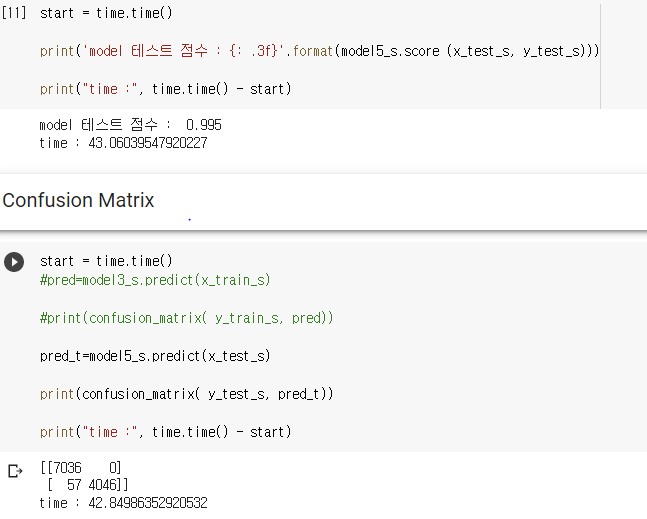

### 테스트 데이터의 정확도, 정밀도, 재현율, f1score

In [91]:
start=time.time()
acc=accuracy_score(y_test_s,pred_t)
pre=precision_score(y_test_s , pred_t)
rec=recall_score(y_test_s , pred_t)
f1=f1_score(y_test_s,pred_t)
auc=roc_auc_score(y_test_s, pred_t)
print(time.time()-start)

0.023177623748779297


In [94]:
# 정확도
print('정확도 : {:.3f}'.format(acc))
# 정밀도
print('정밀도 : {:.3f}'.format(pre))
# 재현율
print('재현율 : {:.3f}'.format(rec))
# f1_score
print('F1_score : {:.3f}'.format(f1))
# AUC score 
print('ROC_AUC_score : {:.3f}'.format(auc))

정확도 : 0.995
정밀도 : 1.000
재현율 : 0.986
F1_score : 0.993
ROC_AUC_score : 0.993


## 모델 저장

In [ ]:
joblib.dump(model5_d, './model5_d.pkl')
joblib.dump(model3_d, './model3_d.pkl')
joblib.dump(model4_d, './model4_d.pkl')

# 최종 모델

하이퍼파라미터: kernel=rbf, C=1, gamma=3

In [82]:
model5_d

SVC(gamma=3)

In [88]:
import seaborn as sns

In [125]:
cm_t = pd.DataFrame(data=confusion_m, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
cm_t

,Actual Positive:1,Actual Negative:0
Predict Positive:1,7036,0
Predict Negative:0,57,4046


<AxesSubplot:>

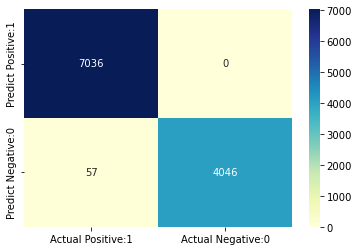

In [126]:
sns.heatmap(cm_t, annot=True, fmt='d', cmap='YlGnBu')

In [120]:
score=[acc,pre,rec,f1,auc]

In [121]:
score

[0.9948828440614059,
 1.0,
 0.9861077260541068,
 0.9930052767210702,
 0.9930538630270533]

In [133]:
pd.DataFrame(score,index=['정확도','정밀도','재현율','F1_score','ROC_auc_score'],columns=['summary'])

,summary
정확도,0.994883
정밀도,1.000000
재현율,0.986108
F1_score,0.993005
ROC_auc_score,0.993054


In [137]:
pr=pred_t2.astype(float)

In [138]:
len(pr)

11139

### ROC CURVE

In [ ]:
# 하이퍼파라미터 probability=True를 추가하면 약 2시간 소요

In [ ]:
start = time.time()
model3_s=SVC(kernel='rbf',C=5,gamma=3,probability=True).fit(x_train_s,y_train_s)

print('model 훈련 점수 : {: .3f}'.format(model3_s.score (x_train_s, y_train_s)))
print('model 테스트 점수 : {: .3f}'.format(model3_s.score (x_test_s, y_test_s)))
print("time :", time.time() - start)

In [ ]:
pred_proba=model3_s.predict_proba(x_test_s)[:,1]
fprs,tprs,thresholds=roc_curve(y_test_s,pred_proba)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [ ]:
plt.plot(fprs,tprs)